In [11]:
!pip install gdown
!gdown --id 1w9urJOhWySu-y-HuiJCLzPRZSuoCzZhP
!unzip -q FruitClassification.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1w9urJOhWySu-y-HuiJCLzPRZSuoCzZhP
From (redirected): https://drive.google.com/uc?id=1w9urJOhWySu-y-HuiJCLzPRZSuoCzZhP&confirm=t&uuid=d970e9ff-0b3c-447a-8b57-6a56257761c9
To: /content/FruitClassification.zip
100% 27.8M/27.8M [00:00<00:00, 39.2MB/s]


Import Required Libraries

In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split

Checking what's inside /content/ after unzipping:

In [14]:
print(os.listdir("/content"))

['.config', 'Fruit Classification', 'FruitClassification.zip', 'drive', 'sample_data']


Renaming the folder to avoid path issue:

In [15]:
!mv "Fruit Classification" FruitClassification

Question 1: What does the dataset represent? The dataset contains images of different types of fruits used for image classification tasks. Each class represents a type of fruit.

Question 2: How many total images are in the dataset?

In [16]:
dataset_path = "/content/FruitClassification"
total_images = 0

# Images in all the sub folders of the dataset
for root, dirs, files in os.walk(dataset_path):
    total_images += len([f for f in files if f.endswith(('jpg', 'png', 'jpeg'))])
print("Total images in the dataset is:", total_images)

Total images in the dataset is: 6282


Question 3: What is the distribution of images across different classes?

In [17]:
# Set path to the Train directory (where class folders are)
train_path = "/content/FruitClassification/Train"

test_path = "/content/FruitClassification/Test"

Classes: ['Cherry', 'Mango', 'Banana', 'Grape', 'Peach']

 Image Distribution per Class:
        Number of Images
Grape               1475
Banana              1429
Cherry              1229
Peach               1229
Mango                915

Total Images in Train Set: 6277


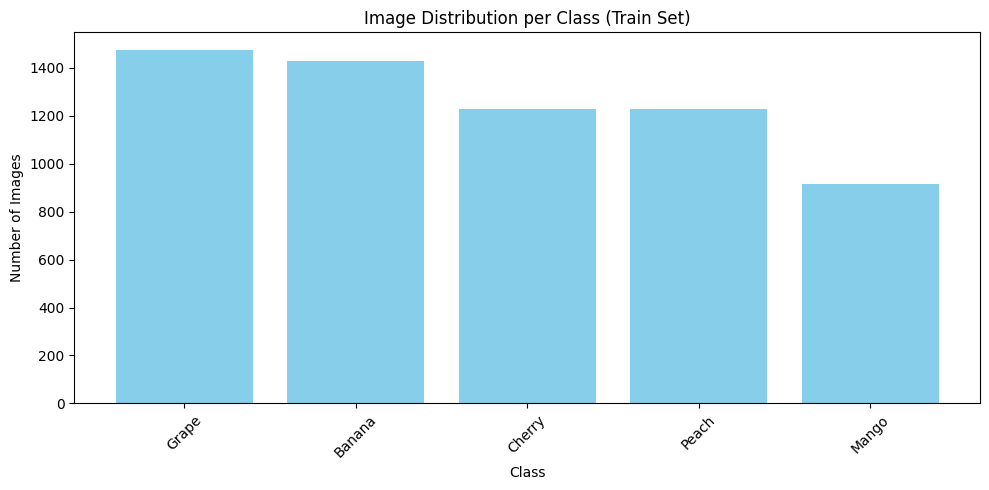

In [18]:
# List all classes (subfolder names)
classes = os.listdir(train_path)
print("Classes:", classes)

# Count images per class
class_counts = {}
for class_name in os.listdir(train_path):
    class_dir = os.path.join(train_path, class_name)
    if os.path.isdir(class_dir):
        num_images = len([
            f for f in os.listdir(class_dir)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        class_counts[class_name] = num_images

# Display as DataFrame
df_counts = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Number of Images'])
df_counts = df_counts.sort_values(by='Number of Images', ascending=False)

print("\n Image Distribution per Class:")
print(df_counts)

# Total images
total_images = sum(class_counts.values())
print("\nTotal Images in Train Set:", total_images)

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(df_counts.index, df_counts['Number of Images'], color='skyblue')
plt.xticks(rotation=45)
plt.title("Image Distribution per Class (Train Set)")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

In [19]:
def check_and_remove_corrupted_images(dataset_path):
    corrupted_images = []

    for class_folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_folder)
        if not os.path.isdir(class_path):
            continue
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            try:
                with Image.open(image_path) as img:
                    img.verify()
            except Exception as e:
                corrupted_images.append(image_path)
                print(f"Corrupted image found and removed: {image_path}")
                os.remove(image_path)

    if not corrupted_images:
        print("No corrupted image found.")
    else:
        print(f"\n Total corrupted images removed: {len(corrupted_images)}")

# Run the check
check_and_remove_corrupted_images(train_path)


Corrupted image found and removed: /content/FruitClassification/Train/Cherry/r_202_100.jpg
Corrupted image found and removed: /content/FruitClassification/Train/Cherry/r_269_100.jpg
Corrupted image found and removed: /content/FruitClassification/Train/Cherry/r_302_100.jpg
Corrupted image found and removed: /content/FruitClassification/Train/Cherry/r_217_100.jpg
Corrupted image found and removed: /content/FruitClassification/Train/Cherry/r_136_100(1).jpg
Corrupted image found and removed: /content/FruitClassification/Train/Cherry/r_262_100(1).jpg
Corrupted image found and removed: /content/FruitClassification/Train/Cherry/r2_108_100.jpg
Corrupted image found and removed: /content/FruitClassification/Train/Mango/r_28_100.jpg
Corrupted image found and removed: /content/FruitClassification/Train/Mango/193_100(1).jpg
Corrupted image found and removed: /content/FruitClassification/Train/Mango/r_114_100(1).jpg
Corrupted image found and removed: /content/FruitClassification/Train/Mango/r_195_1

In [21]:
# List all classes (subfolder names) after removing corrupted images
classes = os.listdir(train_path)
print("Classes:", classes)

# Count images per class
class_counts = {}
for class_name in os.listdir(train_path):
    class_dir = os.path.join(train_path, class_name)
    if os.path.isdir(class_dir):
        num_images = len([
            f for f in os.listdir(class_dir)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        class_counts[class_name] = num_images

# Display as DataFrame
df_counts = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Number of Images'])
df_counts = df_counts.sort_values(by='Number of Images', ascending=False)

print("\n Image Distribution per Class:")
print(df_counts)

# Total images
total_images = sum(class_counts.values())
print("\nTotal Images in Train Set:", total_images)

Classes: ['Cherry', 'Mango', 'Banana', 'Grape', 'Peach']

 Image Distribution per Class:
        Number of Images
Grape               1468
Banana              1422
Cherry              1222
Peach               1222
Mango                908

Total Images in Train Set: 6242


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions
img_width, img_height = 180, 180
batch_size = 32

# Training Data Generator (with Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalization
    validation_split=0.2,    # 80-20 split
    rotation_range=20,       # Augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [24]:
# Training Set
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # 80% for training
)

# Validation Set
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # 20% for validation
)

Found 4996 images belonging to 5 classes.
Found 1246 images belonging to 5 classes.


In [25]:
import shutil

# 1. Create image data generator for test set
test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalization

# 2. Create temporary directory structure
temp_test_dir = "/content/test_temp"
dummy_class = "test_images"
os.makedirs(os.path.join(temp_test_dir, dummy_class), exist_ok=True)

# 3. Move test images
for img_file in os.listdir(test_path):
    if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
        shutil.move(
            os.path.join(test_path, img_file),
            os.path.join(temp_test_dir, dummy_class, img_file)
        )

# 4. Create test generator
test_generator = test_datagen.flow_from_directory(
    temp_test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for correct evaluation
)

print(f"Found {test_generator.samples} test images")

Found 5 images belonging to 1 classes.
Found 5 test images


Visualization of Augmented Images

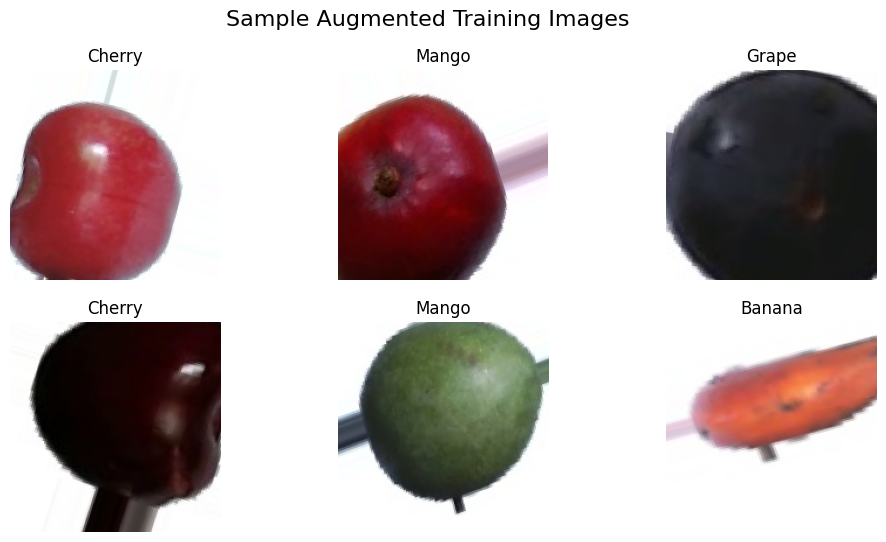

In [27]:
# Get class names from train_generator
class_indices = train_generator.class_indices         # {'Banana': 0, 'Cherry': 1, ...}
classes = list(class_indices.keys())                  # ['Banana', 'Cherry', ...]


# Visualize augmented images
sample_images, sample_labels = next(train_generator)
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(sample_images[i])
    plt.title(classes[np.argmax(sample_labels[i])])
    plt.axis('off')
plt.suptitle("Sample Augmented Training Images", fontsize=16)
plt.show()



3.1.2 Design, Train, and Evaluate a Baseline Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Input

model = Sequential([

    Input(shape=(img_width, img_height, 3)),

    # Conv Block 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),

    # Conv Block 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Conv Block 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Fully Connected Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),

    # Output Layer (5 classes)
    Dense(5, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,473,029 (100.99 MB)

 Trainable params: 26,473,029 (100.99 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# 2. Proper training setup
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    verbose=1
)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 53s 340ms/step - accuracy: 0.7502 - loss: 0.7123 - val_accuracy: 0.9567 - val_loss: 0.1241
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 317ms/step - accuracy: 0.9723 - loss: 0.0807 - val_accuracy: 0.8965 - val_loss: 0.2262
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 314ms/step - accuracy: 0.9739 - loss: 0.0825 - val_accuracy: 0.9952 - val_loss: 0.0183
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 317ms/step - accuracy: 0.9907 - loss: 0.0267 - val_accuracy: 0.9976 - val_loss: 0.0122
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 305ms/step - accuracy: 0.9899 - loss: 0.0273 - val_accuracy: 0.9904 - val_loss: 0.0285
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 313ms/step - accuracy: 0.9906 - loss: 0.0406 - val_accuracy: 0.9928 - val_loss: 0.0263
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 314ms/step - accuracy: 0.9920 - loss: 0.0311 - val_accuracy: 0.9623 - val_loss: 0.1042
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 318ms/step - accuracy: 0.9940 - loss: 0

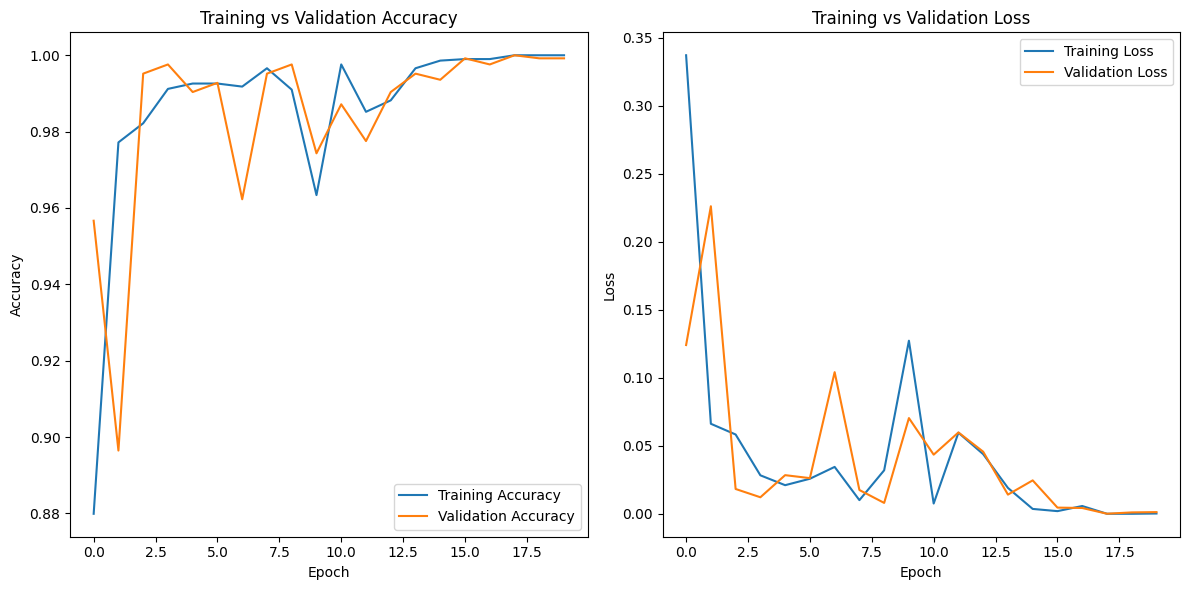

In [33]:
# Plot the Training vs Validation Loss Curves and Training vs Validation Accuracy Curves

plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [34]:
# Print key metrics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
gap = abs(final_train_acc - final_val_acc)

print(f"Final Training Accuracy: {final_train_acc*100:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc*100:.2f}%")
print(f"Accuracy Gap: {gap*100:.2f}%")
print(f"Last Loss: {history.history['loss'][-1]:.4f}")
print(f"Last Val Loss: {history.history['val_loss'][-1]:.4f}")

Final Training Accuracy: 100.00%
Final Validation Accuracy: 99.92%
Accuracy Gap: 0.08%
Last Loss: 0.0003
Last Val Loss: 0.0013


In [35]:
from sklearn.metrics import classification_report


# Get predictions on the validation data
Y_pred = model.predict(validation_generator, steps=len(validation_generator))
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 218ms/step
Classification Report:
              precision    recall  f1-score   support

      Banana       0.22      0.22      0.22       284
      Cherry       0.20      0.20      0.20       244
       Grape       0.24      0.24      0.24       293
       Mango       0.17      0.17      0.17       181
       Peach       0.20      0.20      0.20       244

    accuracy                           0.21      1246
   macro avg       0.21      0.21      0.21      1246
weighted avg       0.21      0.21      0.21      1246



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step

Image: 11_100.jpg
True class: test_images
Predicted: Mango (100.0%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Image: 14_100.jpg
True class: test_images
Predicted: Grape (100.0%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Image: 1_100(2).jpg
True class: test_images
Predicted: Banana (100.0%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Image: 26_100.jpg
True class: test_images
Predicted: Peach (100.0%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Image: 5_100.jpg
True class: test_images
Predicted: Cherry (100.0%)


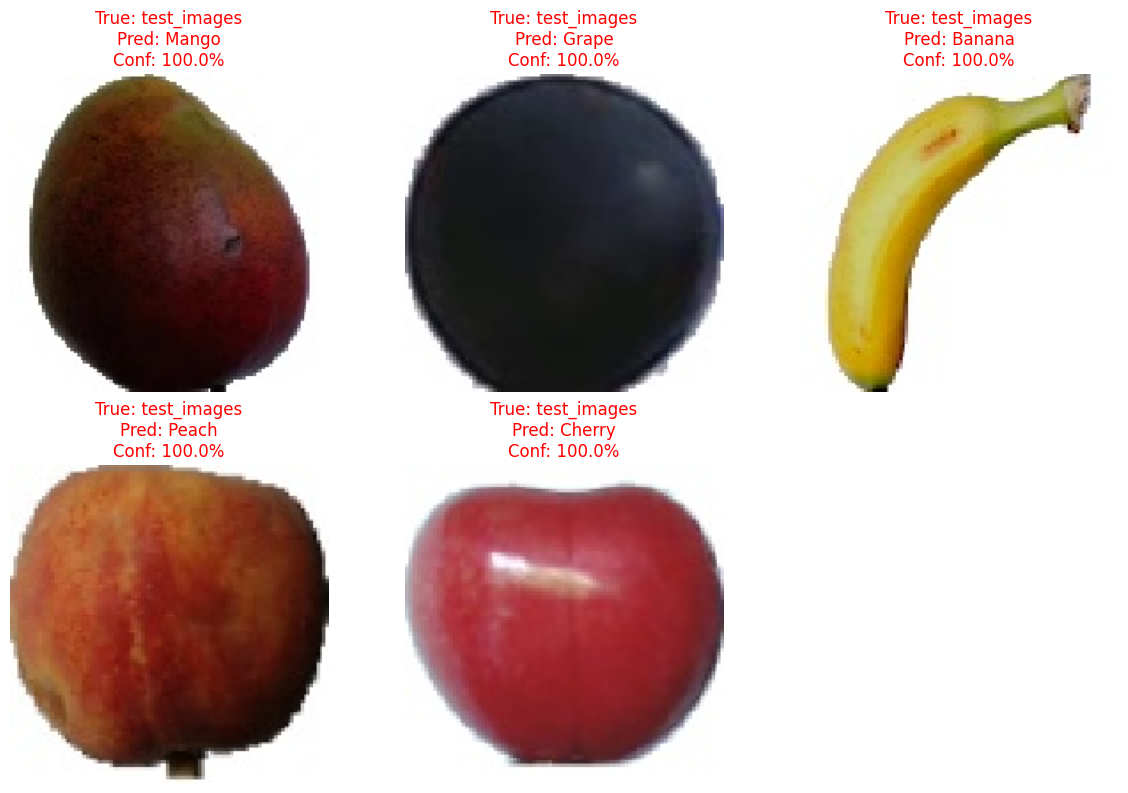

In [36]:
from tensorflow.keras.preprocessing import image

def predict_and_plot(image_paths, model, classes, img_width, img_height):
    """
    Perform inference on multiple images and plot results with confidence scores
    Args:
        image_paths: List of paths to test images
        model: Trained Keras model
        classes: List of class names
        img_width: Target image width
        img_height: Target image height
    """
    plt.figure(figsize=(12, 8))

    for i, img_path in enumerate(image_paths):
        # Load and preprocess image
        img = image.load_img(img_path, target_size=(img_width, img_height))
        img_array = np.expand_dims(image.img_to_array(img), axis=0) / 255.0

        # Get prediction
        preds = model.predict(img_array)[0]
        pred_class = classes[np.argmax(preds)]
        confidence = np.max(preds) * 100

        # Get true class from path (assuming structure: .../class_name/image.jpg)
        true_class = img_path.split('/')[-2] if '/' in img_path else "Unknown"

        # Plot the image with the result
        plt.subplot(2, 3, i+1)
        plt.imshow(img)
        plt.title(f"True: {true_class}\nPred: {pred_class}\nConf: {confidence:.1f}%",
                  color='green' if pred_class == true_class else 'red')
        plt.axis('off')

        # Print prediction details
        print(f"\nImage: {img_path.split('/')[-1]}")
        print(f"True class: {true_class}")
        print(f"Predicted: {pred_class} ({confidence:.1f}%)")

    plt.tight_layout()
    plt.show()

# Example test images
test_samples = [
   "/content/test_temp/test_images/11_100.jpg",
    "/content/test_temp/test_images/14_100.jpg",
    "/content/test_temp/test_images/1_100(2).jpg",
    "/content/test_temp/test_images/26_100.jpg",
    "/content/test_temp/test_images/5_100.jpg"
]

# Call the function
predict_and_plot(
    image_paths=test_samples,
    model=model,
    classes=classes,
    img_width=img_width,
    img_height=img_height
)


Discuss key observations about model performance.

3.1.3 Design, Train , and Evaluate Deeper Architecture with Regularization Layer

1. Model Architecture

In [38]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

deeper_model = Sequential([
    # Input layer
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), padding='same', input_shape=(img_width, img_height, 3)),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),

    # Conv Block 1
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),

    # Conv Block 2
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),

    # Fully connected layers
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])


Print and analyze the new model summary.

In [39]:
# Compile
deeper_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Summary
deeper_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 180, 180, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 180, 180, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 180, 180, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 90, 90, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 90, 90, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 45, 45, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 45, 45, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │    31,719,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,140,453 (122.61 MB)

 Trainable params: 32,140,005 (122.60 MB)

 Non-trainable params: 448 (1.75 KB)

2. Model Training

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

# Train with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_deeper = deeper_model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stop],
    verbose=1
)



Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 85s 431ms/step - accuracy: 0.4395 - loss: 22.4873 - val_accuracy: 0.2352 - val_loss: 3.2197
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 53s 336ms/step - accuracy: 0.8332 - loss: 1.9902 - val_accuracy: 0.3868 - val_loss: 2.6354
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 333ms/step - accuracy: 0.9534 - loss: 1.3291 - val_accuracy: 0.4262 - val_loss: 3.0978
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 53s 338ms/step - accuracy: 0.9516 - loss: 1.0932 - val_accuracy: 0.9350 - val_loss: 1.0997
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 53s 337ms/step - accuracy: 0.9660 - loss: 0.8795 - val_accuracy: 0.9133 - val_loss: 0.9607
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 333ms/step - accuracy: 0.9569 - loss: 0.8180 - val_accuracy: 0.8339 - val_loss: 1.1057
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 334ms/step - accuracy: 0.9610 - loss: 0.7006 - val_accuracy: 0.5931 - val_loss: 3.1863
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 53s 338ms/step - accuracy: 0.9487 - loss: 

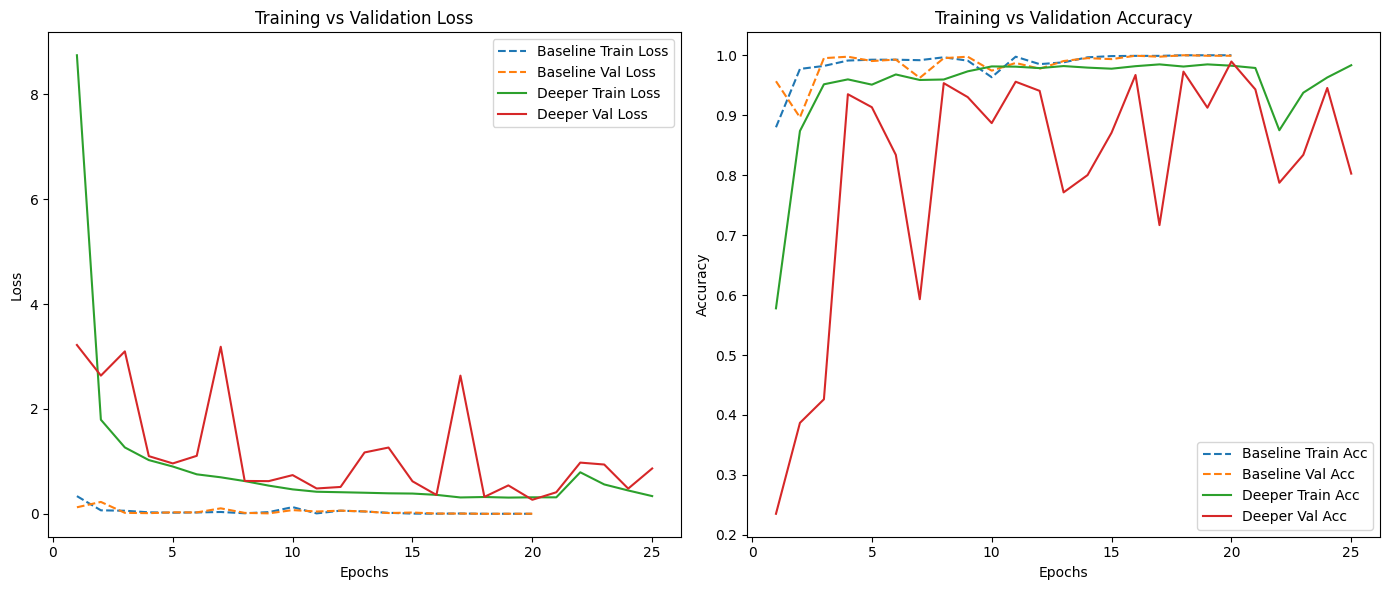

In [42]:
# Extract metrics for both model
baseline_loss = history.history['loss']
baseline_val_loss = history.history['val_loss']
baseline_acc = history.history['accuracy']
baseline_val_acc = history.history['val_accuracy']

deep_loss = history_deeper.history['loss']
deep_val_loss = history_deeper.history['val_loss']
deep_acc = history_deeper.history['accuracy']
deep_val_acc = history_deeper.history['val_accuracy']


baseline_epochs_range = range(1, len(baseline_loss) + 1)
deep_epochs_range = range(1, len(deep_loss) + 1)


# Plotting Loss and Accuracy
plt.figure(figsize=(14, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(baseline_epochs_range, baseline_loss, label='Baseline Train Loss', linestyle='--')
plt.plot(baseline_epochs_range, baseline_val_loss, label='Baseline Val Loss', linestyle='--')
plt.plot(deep_epochs_range, deep_loss, label='Deeper Train Loss')
plt.plot(deep_epochs_range, deep_val_loss, label='Deeper Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(baseline_epochs_range, baseline_acc, label='Baseline Train Acc', linestyle='--')
plt.plot(baseline_epochs_range, baseline_val_acc, label='Baseline Val Acc', linestyle='--')
plt.plot(deep_epochs_range, deep_acc, label='Deeper Train Acc')
plt.plot(deep_epochs_range, deep_val_acc, label='Deeper Val Acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


3. Model Evaluation

3.1.4 Experimentation and Comparative Analysis

1. Baseline vs. Deeper Model Performance

In [44]:
# Accuracy Comparison
print(f"Baseline Val Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")
print(f"Deeper Model Val Accuracy: {history_deeper.history['val_accuracy'][-1]*100:.2f}%")

# Loss Comparison
print(f"Baseline Val Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Deeper Model Val Loss: {history_deeper.history['val_loss'][-1]:.4f}")



Baseline Val Accuracy: 99.92%
Deeper Model Val Accuracy: 80.26%
Baseline Val Loss: 0.0013
Deeper Model Val Loss: 0.8645


Evaluate both models:

In [45]:
# For baseline
baseline_preds = model.predict(validation_generator)
baseline_y_pred = np.argmax(baseline_preds, axis=1)
baseline_y_true = validation_generator.classes

# For deeper
deeper_preds = deeper_model.predict(validation_generator)
deeper_y_pred = np.argmax(deeper_preds, axis=1)

# Class names
class_names = list(validation_generator.class_indices.keys())

print("Baseline Model Classification Report:")
print(classification_report(baseline_y_true, baseline_y_pred, target_names=class_names))

print("Deeper Model Classification Report:")
print(classification_report(baseline_y_true, deeper_y_pred, target_names=class_names))


39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 219ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step
Baseline Model Classification Report:
              precision    recall  f1-score   support

      Banana       0.23      0.23      0.23       284
      Cherry       0.24      0.24      0.24       244
       Grape       0.26      0.26      0.26       293
       Mango       0.10      0.10      0.10       181
       Peach       0.18      0.18      0.18       244

    accuracy                           0.21      1246
   macro avg       0.20      0.20      0.20      1246
weighted avg       0.21      0.21      0.21      1246

Deeper Model Classification Report:
              precision    recall  f1-score   support

      Banana       0.23      0.22      0.23       284
      Cherry       0.20      0.20      0.20       244
       Grape       0.24      0.25      0.25       293
       Mango       0.12      0.12      0.12       181
       Peach       0.22      0.22      0.22       244

    accuracy                

Discussion points:
Did the deeper model reduce misclassification?

Did val accuracy increase?

Did overfitting decrease with regularization?

Computational Efficiency

Compare training time and computational cost of the two models.

In [46]:
import time

# Training Baseline Model
start_time = time.time()
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=1
)
baseline_training_time = time.time() - start_time
print(f"Baseline Model Training Time: {baseline_training_time:.2f} seconds")

# Training Deeper Model
start_time = time.time()
deep_history = deeper_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=1
)
deeper_training_time = time.time() - start_time
print(f"Deeper Model Training Time: {deeper_training_time:.2f} seconds")

# Compare Training Time
print("Training Time Comparison:")
print(f"Baseline Model: {baseline_training_time:.2f} seconds")
print(f"Deeper Model: {deeper_training_time:.2f} seconds")


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 310ms/step - accuracy: 0.9913 - loss: 0.0325 - val_accuracy: 0.9992 - val_loss: 0.0046
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 312ms/step - accuracy: 0.9945 - loss: 0.0178 - val_accuracy: 0.9992 - val_loss: 0.0079
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 317ms/step - accuracy: 0.9929 - loss: 0.0218 - val_accuracy: 0.9968 - val_loss: 0.0073
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 311ms/step - accuracy: 0.9984 - loss: 0.0044 - val_accuracy: 0.9719 - val_loss: 0.1307
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 303ms/step - accuracy: 0.9952 - loss: 0.0207 - val_accuracy: 0.9912 - val_loss: 0.0313
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 310ms/step - accuracy: 0.9991 - loss: 0.0039 - val_accuracy: 0.9976 - val_loss: 0.0213
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 312ms/step - accuracy: 0.9980 - loss: 0.0082 - val_accuracy: 0.9960 - val_loss: 0.0127
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 310ms/step - accuracy: 1.0000 - loss: 3

3. Optimizer Analysis: SGD vs Adam

In [49]:
def create_deeper_model(input_shape, num_classes):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
    from tensorflow.keras.regularizers import l2

    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), padding='same', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.25),
        Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),
        Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model


In [50]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# Create new instance of the model
deeper_model_sgd = create_deeper_model((img_width, img_height, 3), train_generator.num_classes)

# Compile with SGD
deeper_model_sgd.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train
history_sgd = deeper_model_sgd.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 444ms/step - accuracy: 0.2326 - loss: 13.3916 - val_accuracy: 0.2352 - val_loss: 4.1539
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 331ms/step - accuracy: 0.2263 - loss: 4.1167 - val_accuracy: 0.2352 - val_loss: 3.9981
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 333ms/step - accuracy: 0.2286 - loss: 3.9606 - val_accuracy: 0.2352 - val_loss: 3.8515
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 53s 335ms/step - accuracy: 0.2353 - loss: 3.8151 - val_accuracy: 0.2352 - val_loss: 3.7142
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 53s 334ms/step - accuracy: 0.2238 - loss: 3.6858 - val_accuracy: 0.2352 - val_loss: 3.5849
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 332ms/step - accuracy: 0.2331 - loss: 3.5528 - val_accuracy: 0.2352 - val_loss: 3.4637
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 330ms/step - accuracy: 0.2335 - loss: 3.4353 - val_accuracy: 0.2352 - val_loss: 3.3497
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 51s 326ms/step - accuracy: 0.2529 - loss: 

In [51]:
print("Adam Optimizer - Best Validation Accuracy:", max(history_deeper.history['val_accuracy']))
print("SGD Optimizer  - Best Validation Accuracy:", max(history_sgd.history['val_accuracy']))

Adam Optimizer - Best Validation Accuracy: 0.9895666241645813
SGD Optimizer  - Best Validation Accuracy: 0.2351524829864502


3.2 Part B: Fine-Tuning a Pre-Trained Model (Transfer Learning).

3.2.1 Loading and Adapting a Pre - Trained Model

In [54]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 (without top layers), using imagenet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

# Freeze all convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for fruit classification
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Final transfer learning model
transfer_model = Model(inputs=base_model.input, outputs=predictions)
transfer_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the architecture
transfer_model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,271,365 (81.14 MB)

 Trainable params: 6,556,677 (25.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

3.2.2 Model Training and Fine - Tuning

In [55]:
# Train only the newly added dense layers (feature extraction strategy)
history_transfer = transfer_model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 79s 438ms/step - accuracy: 0.6648 - loss: 0.8500 - val_accuracy: 0.9109 - val_loss: 0.3069
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 362ms/step - accuracy: 0.9384 - loss: 0.2034 - val_accuracy: 0.9406 - val_loss: 0.1834
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 58s 368ms/step - accuracy: 0.9691 - loss: 0.1172 - val_accuracy: 0.9575 - val_loss: 0.1278
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 56s 359ms/step - accuracy: 0.9780 - loss: 0.0817 - val_accuracy: 0.9543 - val_loss: 0.1298
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 357ms/step - accuracy: 0.9792 - loss: 0.0744 - val_accuracy: 0.9366 - val_loss: 0.1521
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 66s 422ms/step - accuracy: 0.9872 - loss: 0.0512 - val_accuracy: 0.9831 - val_loss: 0.0603
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 67s 424ms/step - accuracy: 0.9928 - loss: 0.0369 - val_accuracy: 0.9727 - val_loss: 0.0783
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 364ms/step - accuracy: 0.9878 - loss: 0

3.2.3 Model Evaluation and Prediction

Classification Accuracy

In [57]:
# Compare with scratch models
print("Transfer Learning - Validation Accuracy:", max(history_transfer.history['val_accuracy']))


Transfer Learning - Validation Accuracy: 0.9943820238113403


Classification Report & Confusion Matrix

39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 303ms/step

Classification Report:

              precision    recall  f1-score   support

      Banana       0.23      0.23      0.23       284
      Cherry       0.19      0.19      0.19       244
       Grape       0.21      0.19      0.20       293
       Mango       0.12      0.12      0.12       181
       Peach       0.22      0.24      0.23       244

    accuracy                           0.20      1246
   macro avg       0.19      0.19      0.19      1246
weighted avg       0.20      0.20      0.20      1246



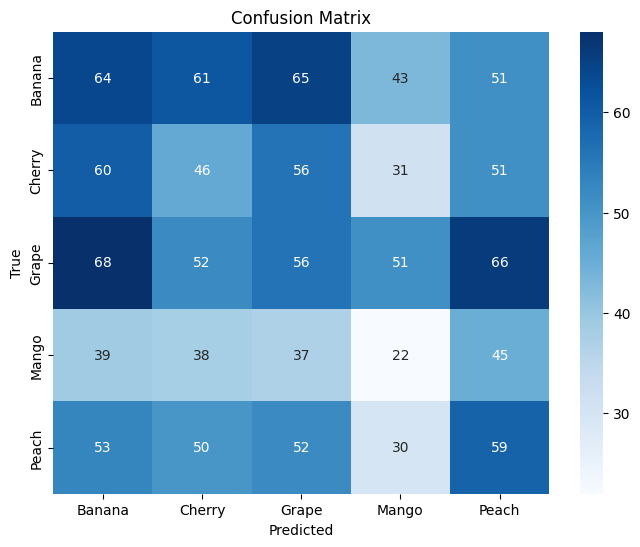

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_model(model, generator):
    y_pred = model.predict(generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = generator.classes
    class_names = list(generator.class_indices.keys())

    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred_classes, target_names=class_names))

    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

evaluate_model(transfer_model, validation_generator)


Training & Validation Performance

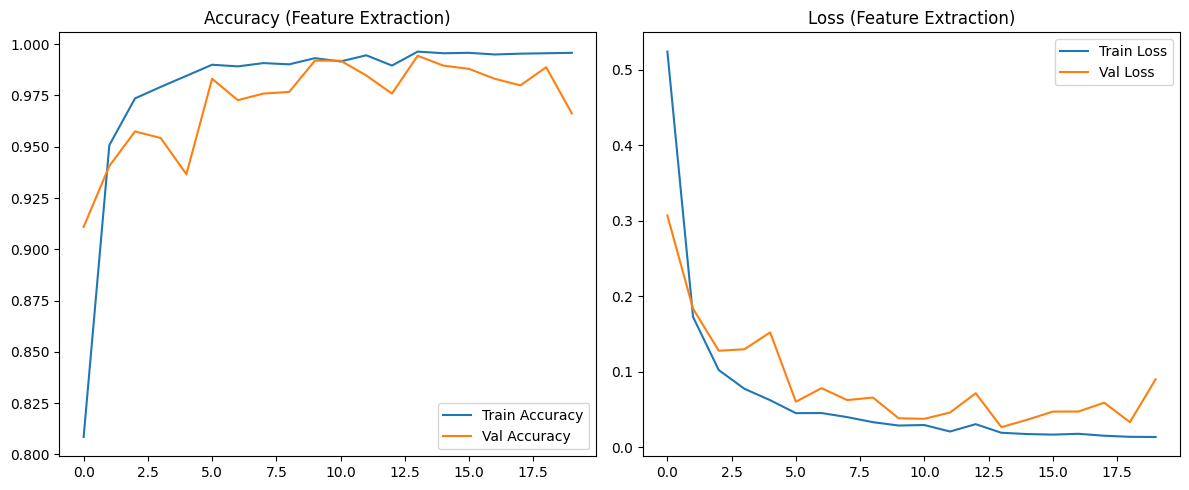

In [64]:
def plot_training_history(history, title=""):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title("Accuracy " + title)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title("Loss " + title)

    plt.tight_layout()
    plt.show()

plot_training_history(history_transfer, "(Feature Extraction)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


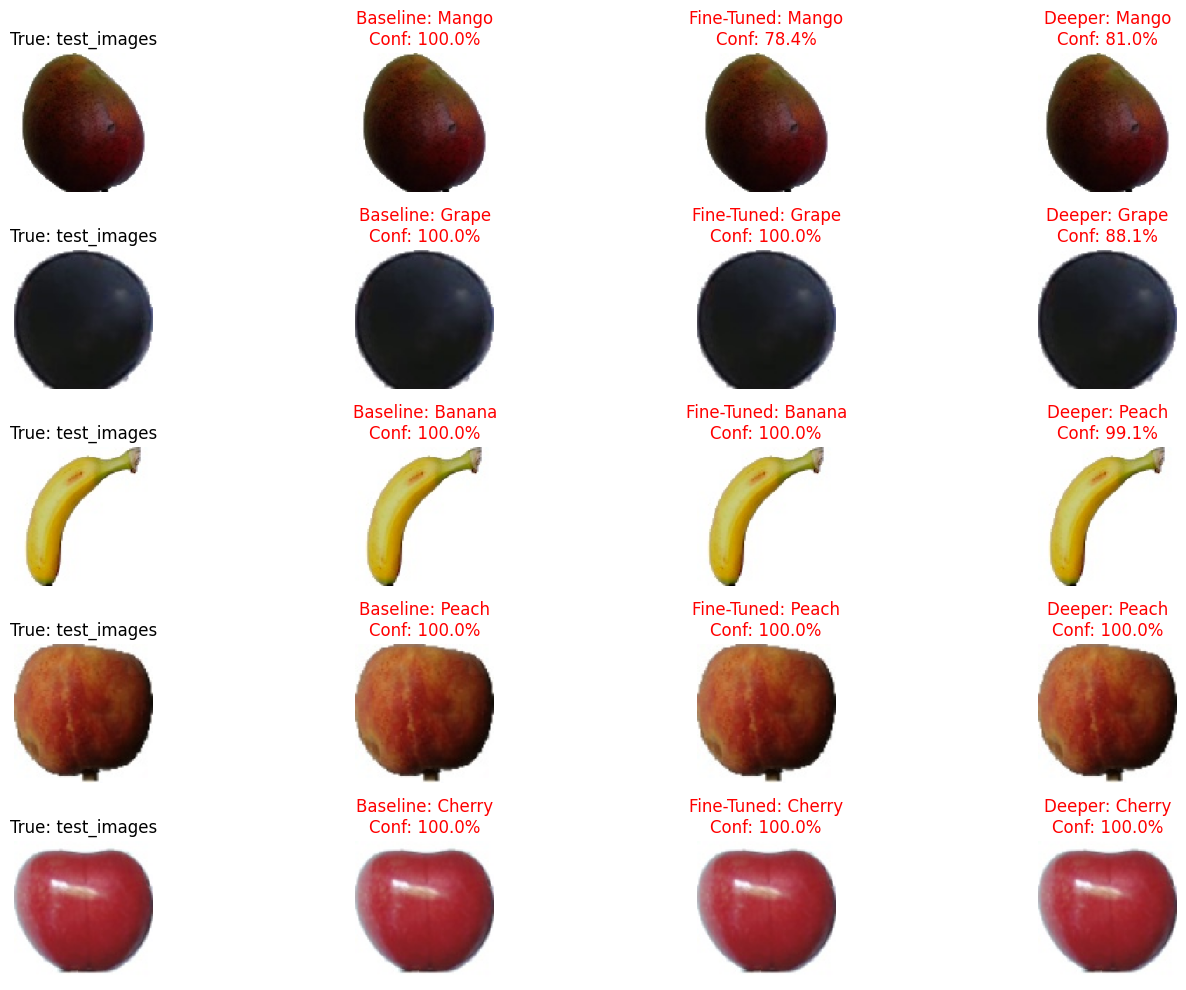

In [70]:
def predict_and_plot_comparison(image_paths, baseline_model, fine_tuned_model, deeper_model, classes, img_width, img_height):
    """
    Perform inference on multiple images using baseline, fine-tuned, and deeper models and plot the comparison
    Args:
        image_paths: List of paths to test images
        baseline_model: Trained baseline Keras model
        fine_tuned_model: Trained fine-tuned Keras model
        deeper_model: Trained deeper Keras model
        classes: List of class names
        img_width: Target image width
        img_height: Target image height
    """
    plt.figure(figsize=(15, 10))

    for i, img_path in enumerate(image_paths):
        # Load and preprocess image
        img = image.load_img(img_path, target_size=(img_width, img_height))
        img_array = np.expand_dims(image.img_to_array(img), axis=0) / 255.0

        # Get predictions from all models
        baseline_preds = baseline_model.predict(img_array)[0]
        fine_tuned_preds = fine_tuned_model.predict(img_array)[0]
        deeper_preds = deeper_model.predict(img_array)[0]

        baseline_pred_class = classes[np.argmax(baseline_preds)]
        fine_tuned_pred_class = classes[np.argmax(fine_tuned_preds)]
        deeper_pred_class = classes[np.argmax(deeper_preds)]

        baseline_confidence = np.max(baseline_preds) * 100
        fine_tuned_confidence = np.max(fine_tuned_preds) * 100
        deeper_confidence = np.max(deeper_preds) * 100

        # Get true class from path (assuming structure: .../class_name/image.jpg)
        true_class = img_path.split('/')[-2] if '/' in img_path else "Unknown"

        # Plot the images and predictions
        plt.subplot(len(image_paths), 4, i * 4 + 1)
        plt.imshow(img)
        plt.title(f"True: {true_class}")
        plt.axis('off')

        plt.subplot(len(image_paths), 4, i * 4 + 2)
        plt.imshow(img)
        plt.title(f"Baseline: {baseline_pred_class}\nConf: {baseline_confidence:.1f}%", color='green' if baseline_pred_class == true_class else 'red')
        plt.axis('off')

        plt.subplot(len(image_paths), 4, i * 4 + 3)
        plt.imshow(img)
        plt.title(f"Fine-Tuned: {fine_tuned_pred_class}\nConf: {fine_tuned_confidence:.1f}%", color='green' if fine_tuned_pred_class == true_class else 'red')
        plt.axis('off')

        plt.subplot(len(image_paths), 4, i * 4 + 4)
        plt.imshow(img)
        plt.title(f"Deeper: {deeper_pred_class}\nConf: {deeper_confidence:.1f}%", color='green' if deeper_pred_class == true_class else 'red')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to compare all models
predict_and_plot_comparison(
    image_paths=test_samples,
    baseline_model=model,            # Baseline model
    fine_tuned_model=transfer_model, # Fine-tuned model
    deeper_model=deeper_model,       # Deeper model
    classes=classes,
    img_width=img_width,
    img_height=img_height
)


Multi-Class ROC Curve

39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 269ms/step


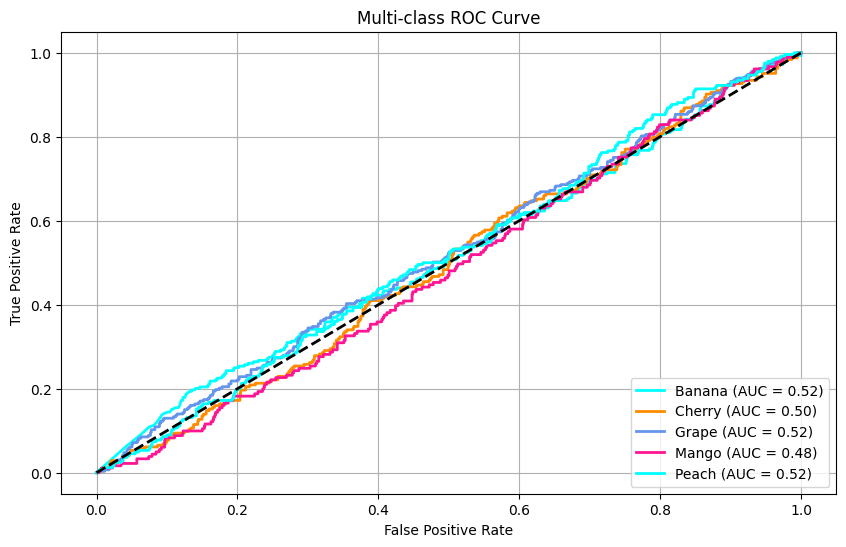

In [71]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

def plot_multiclass_roc(model, generator, class_names, title='Multi-class ROC Curve'):
    generator.reset()
    y_true = generator.classes
    y_score = model.predict(generator)

    y_true_bin = label_binarize(y_true, classes=list(range(len(class_names))))
    n_classes = len(class_names)

    fpr, tpr, roc_auc = {}, {}, {}
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 6))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

class_names = list(validation_generator.class_indices.keys())
plot_multiclass_roc(transfer_model, validation_generator, class_names)
